<a href="https://colab.research.google.com/github/Tony162b/Customer-Segmentation/blob/segmentation_improvements/Copy_of_MockD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The CRoss Industry Standard Process for Data Mining (CRISP-DM) is the data sciece process the would be used for this process
#CRISP-DM is made out of six six sequential phases and they are:

1.Business understanding – What does the business need?

2.Data understanding – What data do we have / need? Is it clean?

3.Data preparation – How do we organize the data for modeling?

4.Modeling – What modeling techniques should we apply?

5.Evaluation – Which model best meets the business objectives?

6.Deployment – How do stakeholders access the results?

#Stage 1-Business understanding
#Import libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#First step of the process

#Reading the dataset

In [ ]:
df=pd.read_csv('/content/MOCK_DATA.csv')
df.head()

,id,customer_id,first_name,last_name,email,gender,income,spending_per_month,loan_burden,health_burden,major_purchases
0,1,f63e4b72-a7ca-48e1-ba57-014e414fca68,Wyatan,Cadigan,wcadigan0@who.int,Male,$156703.51,$975.78,$433525.17,0,mastercard
1,2,8a2eed34-f03b-4f78-8f2c-8c59a947314f,Harriett,Hanratty,hhanratty1@sitemeter.com,Female,$74103.09,$4087.96,$414034.91,0,mastercard
2,3,3d3c984a-3125-4f73-8e77-8d139a04f2e3,Danya,Rosoni,drosoni2@histats.com,Male,$6594.46,$28.08,$415657.74,0,mastercard
3,4,240de159-ae75-4e0d-9b3c-6e5cf9bc128c,Shermy,NaN,svye3@cam.ac.uk,Male,$18348.07,$2823.02,$314674.14,1,mastercard
4,5,64c3ccd2-af18-46f3-8545-53eac4b7de95,Tatiania,Preedy,tpreedy4@answers.com,Female,$16625.11,$544.94,$182711.32,0,mastercard


In [ ]:
df.describe()

,id,health_burden
count,1000.000000,1000.000000
mean,500.500000,0.297000
std,288.819436,0.457165
min,1.000000,0.000000
25%,250.750000,0.000000
50%,500.500000,0.000000
75%,750.250000,1.000000
max,1000.000000,1.000000


#Printing the info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  1000 non-null   int64 
 1   customer_id         952 non-null    object
 2   first_name          934 non-null    object
 3   last_name           879 non-null    object
 4   email               1000 non-null   object
 5   gender              1000 non-null   object
 6   income              793 non-null    object
 7   spending_per_month  952 non-null    object
 8   loan_burden         698 non-null    object
 9   health_burden       1000 non-null   int64 
 10  major_purchases     788 non-null    object
dtypes: int64(2), object(9)
memory usage: 86.1+ KB


Check the unique values in each column

In [ ]:
#checking the count of unique values in each column
df.nunique()

id                    1000
customer_id            952
first_name             878
last_name              875
email                 1000
gender                   8
income                 793
spending_per_month     950
loan_burden            698
health_burden            2
major_purchases          1
dtype: int64

After completing the Data Sourcing, the next step in the process of EDA is Data Cleaning. It is very important to get rid of the irregularities and clean the data after sourcing it into the system.

In [ ]:
#we shall drop all the columns that are not relevant or important to the analysis
df.drop(["customer_id"], axis = 1, inplace=True)
df.drop(["id"], axis = 1, inplace=True)
df.drop(['email'],axis=1,inplace=True)
df.drop(['gender'],axis=1,inplace=True)

In [ ]:
#merge two columns
df["name"] = df["first_name"] + " " + df["last_name"]

In [ ]:
df.drop(["first_name"], axis = 1, inplace=True)
df.drop(["last_name"], axis = 1, inplace=True)

In [ ]:
#Creating numerical columns
num_cols=['income','spending_per_month','loan_burden','health_burden']

#Creating categorical variables 
cat_cols= ['major_purchases','name']

In [ ]:
df['income'] = df['income'].replace('$', ' ').replace(',', '') 

In [ ]:
def remove_character_from_column(column):
  column = column.replace("$", "").replace(",","")
  return column

In [ ]:
#checking dataframe after droping the columns
df.head()

,income,spending_per_month,loan_burden,health_burden,major_purchases,name
0,$156703.51,$975.78,$433525.17,0,mastercard,Wyatan Cadigan
1,$74103.09,$4087.96,$414034.91,0,mastercard,Harriett Hanratty
2,$6594.46,$28.08,$415657.74,0,mastercard,Danya Rosoni
3,$18348.07,$2823.02,$314674.14,1,mastercard,NaN
4,$16625.11,$544.94,$182711.32,0,mastercard,Tatiania Preedy


In [ ]:
df['income'] = df['income'].str.replace('$','')

In [ ]:
df['spending_per_month'] = df['spending_per_month'].str.replace('$','')
df['loan_burden'] = df['loan_burden'].str.replace('$','')

In [ ]:
df.head()

,income,spending_per_month,loan_burden,health_burden,major_purchases,name
0,156703.51,975.78,433525.17,0,mastercard,Wyatan Cadigan
1,74103.09,4087.96,414034.91,0,mastercard,Harriett Hanratty
2,6594.46,28.08,415657.74,0,mastercard,Danya Rosoni
3,18348.07,2823.02,314674.14,1,mastercard,NaN
4,16625.11,544.94,182711.32,0,mastercard,Tatiania Preedy


In [ ]:
df['income'] = df['income'].astype('float')
df['spending_per_month'] = df['spending_per_month'].astype('float')
df['loan_burden'] = df['loan_burden'].astype('float')

In [ ]:
# read about feature tools and apply them
#organize the line of codes

#Stage 2-Data understanding

At this stage,we perform Exploratory Data Analysis and Data Preprocessing
EPA-helps understand the data one is working with interms of trend and other important feature to look out for.

Univariate analysis of numerical columns

In [ ]:
#Checking summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
income,793.0,100563.619975,58347.947066,46.04,46509.2000,103506.570,151193.7300,199367.61
spending_per_month,952.0,2439.916576,1425.513199,0.10,1191.5850,2421.605,3658.5925,4998.08
loan_burden,698.0,254243.603367,145450.718303,692.68,131263.3125,253684.600,385628.5575,499542.23
health_burden,1000.0,0.297000,0.457165,0.00,0.0000,0.000,1.0000,1.00


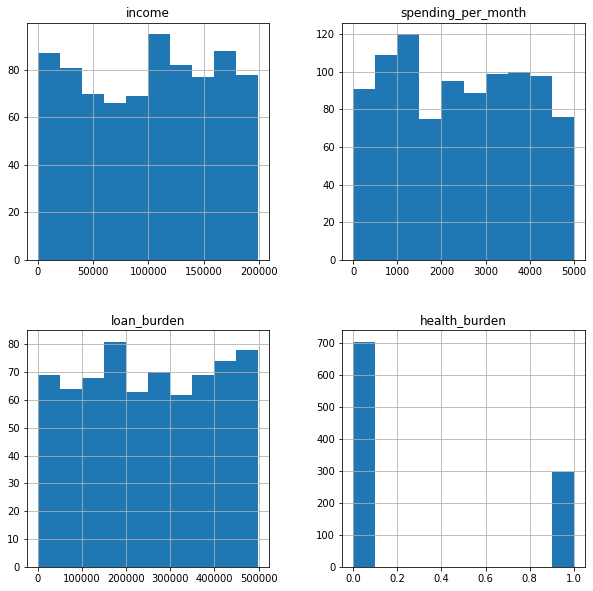

In [ ]:
#creating histograms
df.hist(figsize=(10,10))
plt.show()

Univariate analysis for categorical variables

In [ ]:
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

mastercard    1.0
Name: major_purchases, dtype: float64
****************************************
Wyatan Cadigan        0.00122
Briant Derry          0.00122
Thorpe Schultheiss    0.00122
Carlina Roo           0.00122
Aurilia Antram        0.00122
                       ...   
Eyde Elland           0.00122
Leoline Sinkings      0.00122
Elenore Graalmans     0.00122
Emmerich Laweles      0.00122
Sharleen Arnaudot     0.00122
Name: name, Length: 820, dtype: float64
****************************************


In [ ]:
df.dtypes

income                float64
spending_per_month    float64
loan_burden           float64
health_burden           int64
major_purchases        object
name                   object
dtype: object

In [ ]:
#df['income'].astype(str).astype(int)

# string to int
#pd.to_numeric(df['income'])

#df["income"] = df["income"].astype("int")
#df.dtypes

In [ ]:
df.shape

(1000, 6)

In [ ]:
def clean_currency(income):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(income, str):
        return(income.replace('$', '').replace(',', ''))
    return(income)

In [ ]:
df['income'].apply(type).value_counts()

<class 'float'>    1000
Name: income, dtype: int64

In [ ]:
df.dtypes

income                float64
spending_per_month    float64
loan_burden           float64
health_burden           int64
major_purchases        object
name                   object
dtype: object

In [ ]:
df.columns

Index(['income', 'spending_per_month', 'loan_burden', 'health_burden',
       'major_purchases', 'name'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [ ]:
df.isnull().sum()

income                207
spending_per_month     48
loan_burden           302
health_burden           0
major_purchases       212
name                  180
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.income.dtype

dtype('float64')

In [ ]:
# string to int
#df['income'] = df['income'].astype('int')
#df.dtype

#trying to use a function that can be reused

This function here give you a general idea of the total and percentage of missing data in each column:

In [ ]:
def intitial_eda_checks(df):
    '''
    Takes df
    Checks nulls
    '''
    if df.isnull().sum().sum() > 0:
        mask_total = df.isnull().sum().sort_values(ascending=False) 
        total = mask_total[mask_total > 0]

        mask_percent = df.isnull().mean().sort_values(ascending=False) 
        percent = mask_percent[mask_percent > 0] 

        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
        print(f'Total and Percentage of NaN:\n {missing_data}')
    else: 
        print('No NaN found.')
  

In [ ]:
intitial_eda_checks(df)

Total and Percentage of NaN:
                     Total  Percent
loan_burden           302    0.302
major_purchases       212    0.212
income                207    0.207
name                  180    0.180
spending_per_month     48    0.048


#With specification of the threshold of the missing value percentage, the 
#following function will give you a list of columns that have missing values over that threshold

In [ ]:
def view_columns_w_many_nans(df, missing_percent):
    '''
    Checks which columns have over specified percentage of missing values
    Takes df, missing percentage
    Returns columns as a list
    '''
    mask_percent = df.isnull().mean()
    series = mask_percent[mask_percent > missing_percent]
    columns = series.index.to_list()
    print(columns) 
    return columns

# Deciding  to drop the columns with too many missing values (over a certain threshold you specify), you can use this function to accomplish the task:

In [ ]:
def drop_columns_w_many_nans(df, missing_percent):
    '''
    Takes df, missing percentage
    Drops the columns whose missing value is bigger than missing percentage
    Returns df
    '''
    series = view_columns_w_many_nans(df, missing_percent=missing_percent)
    list_of_cols = series.index.to_list()
    df.drop(columns=list_of_cols)
    print(list_of_cols)
    return df

In [ ]:
df

,income,spending_per_month,loan_burden,health_burden,major_purchases,name
0,156703.51,975.78,433525.17,0,mastercard,Wyatan Cadigan
1,74103.09,4087.96,414034.91,0,mastercard,Harriett Hanratty
2,6594.46,28.08,415657.74,0,mastercard,Danya Rosoni
3,18348.07,2823.02,314674.14,1,mastercard,NaN
4,16625.11,544.94,182711.32,0,mastercard,Tatiania Preedy
...,...,...,...,...,...,...
995,125303.95,4041.82,235349.80,0,NaN,Burl Tomsen
996,41231.18,964.38,NaN,0,mastercard,Guinna Degoy
997,167585.40,NaN,24947.66,0,mastercard,Robena Norsworthy
998,NaN,2879.23,NaN,0,mastercard,Korie Turgoose


In [ ]:
df.isnull().sum()

income                207
spending_per_month     48
loan_burden           302
health_burden           0
major_purchases       212
name                  180
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
#unique values
 
df['income'].unique()

df['spending_per_month'].unique()

df['loan_burden'].unique()

df['major_purchases'].unique()

array(['mastercard', nan], dtype=object)

In [ ]:
df.corr()

,income,spending_per_month,loan_burden,health_burden
income,1.000000,-0.030090,-0.053797,-0.045750
spending_per_month,-0.030090,1.000000,-0.057481,-0.023369
loan_burden,-0.053797,-0.057481,1.000000,0.044647
health_burden,-0.045750,-0.023369,0.044647,1.000000


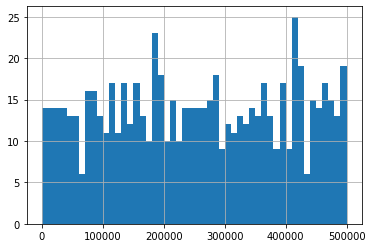

In [ ]:
fig=df['loan_burden'].hist(bins=50)

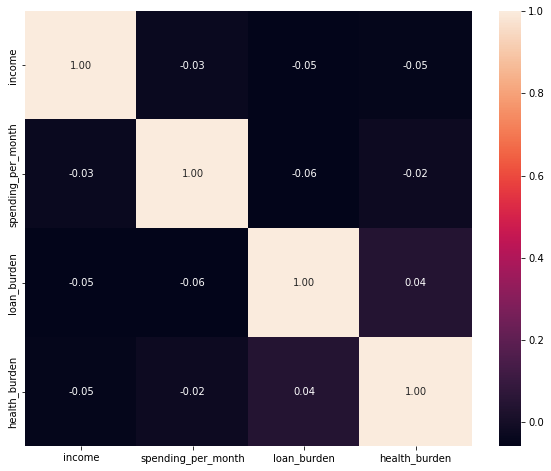

In [ ]:
#correlation among  different vaiables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='0.2f')
plt.show()

Mathematical functions

In [ ]:
from scipy.stats import shapiro

In [ ]:

income = df['income']
stat, p = shapiro(income)
print('stat= %.3f p= %.3f' % (stat,p) )

stat= nan p= 1.000


In [ ]:
df['spending_ratio'] = df['spending_per_month']/df['income']
df['spending_ratio_flipped'] = df['income']/df['spending_per_month']
df['spending_ratio'].describe()



count    7.520000e+02
mean     2.503356e-01
std      2.900811e+00
min      8.004915e-07
25%      1.223226e-02
50%      2.525393e-02
75%      4.830555e-02
max      6.797133e+01
Name: spending_ratio, dtype: float64

In [ ]:
df.columns

Index(['income', 'spending_per_month', 'loan_burden', 'health_burden',
       'major_purchases', 'name', 'spending_ratio', 'spending_ratio_flipped'],
      dtype='object')

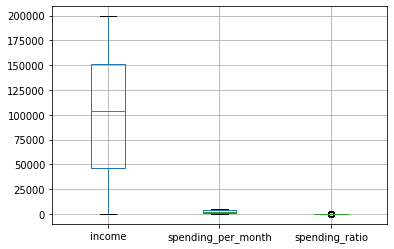

In [ ]:
# A sample boxplot is shown here
df.boxplot(column=['income', 'spending_per_month', 'spending_ratio'])

In [ ]:
col= []
for i in df.columns:
    col.append(int(i)) #this line won't run as col has not been defined above

ValueError: ignored

income
Skew : -0.06


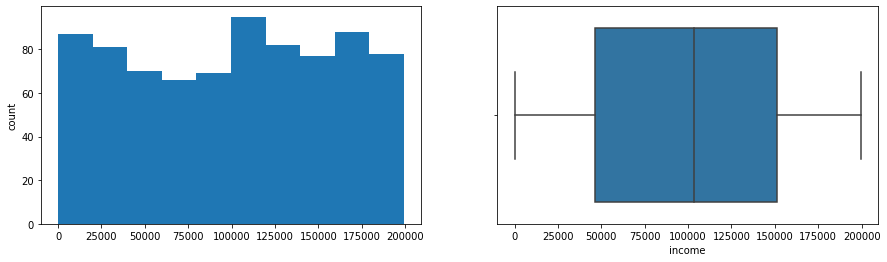

spending_per_month
Skew : 0.04


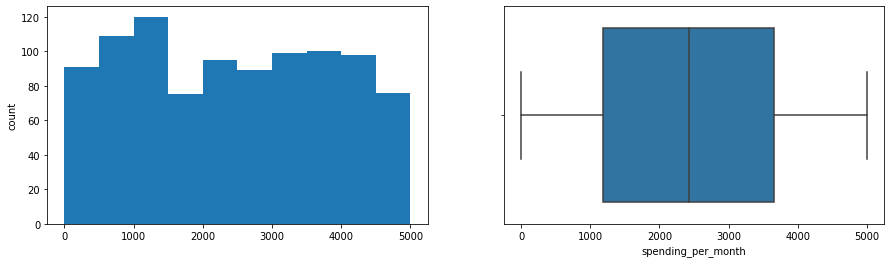

loan_burden
Skew : -0.01


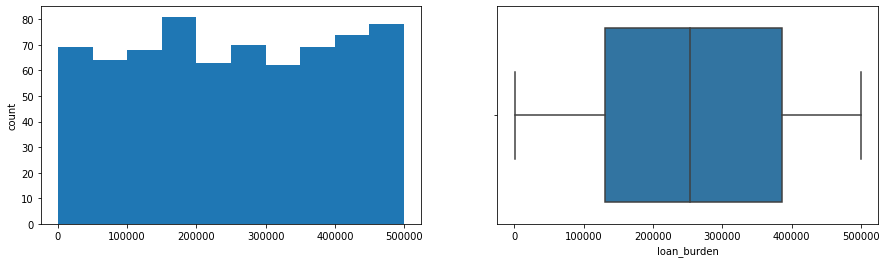

health_burden
Skew : 0.89


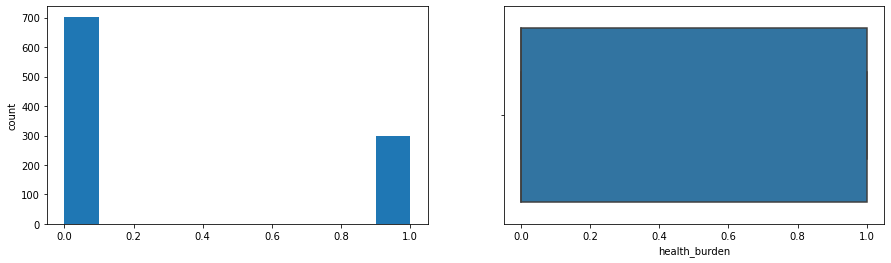

major_purchases


TypeError: ignored

In [ ]:
#checking for outliers
cont_cols = list(df.columns)
for col in cont_cols:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

In [ ]:
#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

#Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

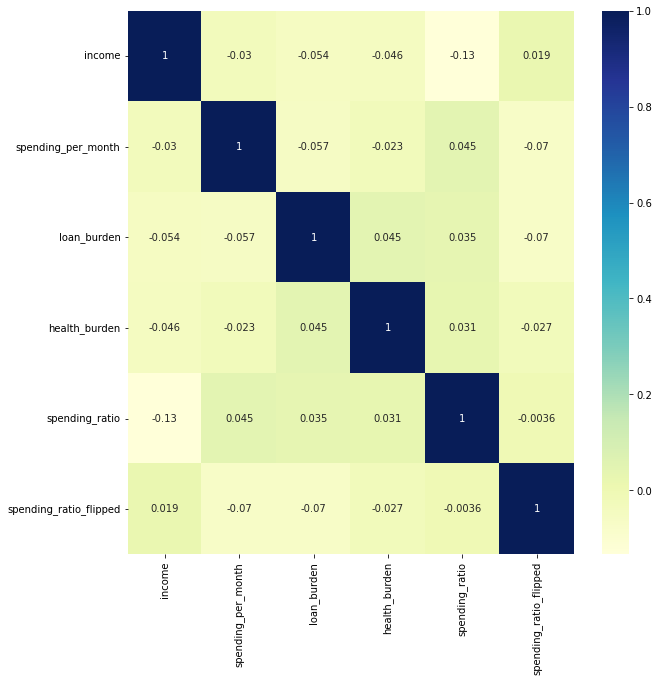

In [ ]:
#checking for corrrelations
plt.figure(figsize  = (10,10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()



In [ ]:
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
df = 5 * randn(100) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(df), std(df)))

mean=50.303 stdv=4.426


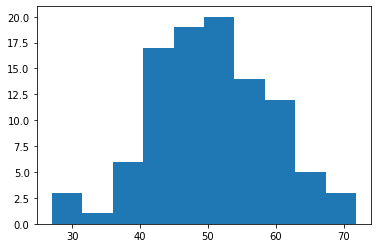

In [ ]:
# histogram plot
# seed the random number generator
seed(1)
# generate univariate observations
df = 10 * randn(100) + 50
# histogram plot
plt.hist(df)
plt.show()

In [ ]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
df = 5 * randn(100) + 50
# normality test
stat, p = shapiro(df)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


In [ ]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
df= 10 * randn(100) + 50
# normality test
stat, p = normaltest(df)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)
